# 📊 Exploratory Data Analysis

## Introduction 

The Titanic dataset is one of the most well-known datasets in the field of data science and machine learning. It contains detailed information about the passengers aboard the Titanic, a British passenger liner that tragically sank in the North Atlantic Ocean on April 15, 1912, after hitting an iceberg. This disaster resulted in the loss of over 1,500 lives and has since become a poignant example of maritime tragedy.

Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. It involves examining the dataset to uncover underlying patterns, spot anomalies, test hypotheses, and check assumptions through summary statistics and graphical representations. For the Titanic dataset, EDA helps us understand the factors that influenced survival rates, such as passenger demographics, socio-economic status, and travel details.

The dataset comprises variables such as passenger age, gender, ticket class, fare paid, and whether or not the passenger survived. By analyzing these variables, we can gain insights into which groups of passengers were more likely to survive and the reasons behind these trends. For instance, we might explore questions like:

- Did gender play a significant role in survival rates?
- Were first-class passengers more likely to survive than those in lower classes?
- How did the age of passengers affect their chances of survival?

Through various visualizations and statistical analyses, EDA provides a foundation for more complex modeling and predictive analysis. It allows us to clean and preprocess the data, handle missing values, and create new features that might improve the performance of machine learning models.



## About Data


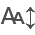

In [1]:
# librerias
from loguru import logger
import pandas as pd
from IPython.display import display
from itables import init_notebook_mode, show
from great_tables import GT, html

from utils import * 

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
init_notebook_mode(all_interactive=True)

In [2]:
def gt_tables(table,col,vo):
    # Flattening the MultiIndex columns
    table.columns = [f'{i}_{j}' for i, j in table.columns]

    # Resetting the index to make 'FareRange' a column again
    table.reset_index(inplace=True)

    # Displaying the DataFrame
    gt_table = ((
        GT(table)
        .tab_header(
            title="Count and Percentage Table",
            subtitle=f"{col} vs {vo}"
        )

        .tab_spanner(
            label="0",
            columns=["Count_0", "Percentage_0"]
        )
        .tab_spanner(
            label="1",
            columns=["Count_1", "Percentage_1"]
        )
        .tab_spanner(
            label=vo,
            columns=["Count_0", "Percentage_0", "Count_1", "Percentage_1"]
        )

        .cols_label(
            Count_0=html("Count"),
            Count_1=html("Count"),
            Percentage_0=html("Percentage"),
            Percentage_1=html("Percentage")

        )
    )
    )
    gt_table = gt_table.fmt_number(columns=["Percentage_0", "Percentage_1"],
                                   decimals=2)  # .opt_stylize(style = 1, color = "blue")

    gt_table = gt_table.tab_options(
        table_background_color="white",
        # table_font_color="darkblue",
        table_font_style="italic",
        table_font_names="Times New Roman",
        heading_background_color="skyblue"
    )
    
    return gt_table

In [3]:
logger.info("Read Data")

# paths
path_raw = "../../data/raw/"
path_procesed = "../../data/processed/"
path_final = "../../data/final/"

# read data
train = pd.read_csv(path_raw + "train.csv")
test = pd.read_csv(path_raw + "test.csv")

# display data
show(train, classes="display nowrap compact",maxBytes = 0)

2024-06-10 08:21:01.240 | INFO     | __main__:<module>:1 - Read Data


In [4]:
# information about the data types and non-null values in each column
print("TRAIN:")
train.info()

TRAIN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>  🔑**Note**: For now, we will focus on the train dataset, but the same should be done for the test dataset.

In [5]:
# check for duplicates in the dataset
duplicates = train.duplicated()

# count the number of duplicate rows
num_duplicates = duplicates.sum()
print("duplicate rows:", num_duplicates)

duplicate rows: 0


To perform an Exploratory Data Analysis (EDA) with visualizations, whether univariate, bivariate or not, it is essential to consider the type of data we are working with. Additionally, we can perform a deep scan of all columns or an in-depth scan of individual columns, depending on the desired speed and detail of our EDA. The goal is to present all findings in a detailed and clear manner to ensure maximum understanding.

In [6]:
# get column names by data types
target = 'Survived'

float_columns = [x for x in list(train.select_dtypes(include=['float64']).columns) if x != target]
integer_columns = [x for x in list(train.select_dtypes(include=['int32', 'int64']).columns) if x != target]
object_columns = [x for x in list(train.select_dtypes(include=['object']).columns) if x != target]

# display column names by data type
print(f"Target: {target}")
print()
print("Total float columns:", len(float_columns))
print("Float columns:", float_columns)
print()
print("Total integer columns:", len(integer_columns))
print("Integer columns:", integer_columns)
print()
print("Total object columns:", len(object_columns))
print("Object columns:", object_columns)

Target: Survived

Total float columns: 2
Float columns: ['Age', 'Fare']

Total integer columns: 4
Integer columns: ['PassengerId', 'Pclass', 'SibSp', 'Parch']

Total object columns: 5
Object columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In this case, the 'Age' column should be an integer, but it contains null values (or `NaN`), which automatically converts it to a `float` type column. For now, let's treat it as a `float` type column.

## About EDA

There are columns used to identify each individual, typically indicated by the term 'ID' in their name. It is essential that these identifiers do not have a value of zero.

It is important to note that these identifiers should not be duplicated unless there is more than one record due to analysis in relation to other columns (e.g., the **period**). In these specific cases, duplication may be relevant and is associated with certain analytical contexts involving other variables or time periods.

In [7]:
logger.info("EDA")
logger.info('PassengerId')
total_nulls = train['PassengerId'].isnull().sum()
print(f"Total null values: {total_nulls} ")

2024-06-10 08:21:01.333 | INFO     | __main__:<module>:1 - EDA
2024-06-10 08:21:01.334 | INFO     | __main__:<module>:2 - PassengerId


Total null values: 0 


In [8]:
# Set as index
train = train.set_index('PassengerId')
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex    Age  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris    male 22.000   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000   
3                                       Heikkinen, Miss. Laina  female 26.000   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000   
5                                     Allen, Mr. William Henry    male 35.000   

             SibSp  Parch            Ticket   Fare Cabin Embarked  
PassengerId                                                        
1                1      0         A/5 21171  7.250   NaN        S  
2                1      0          PC 17599 71.283   C85        C  
3                0      0  STON/O2. 3101282  7.925   NaN        S  
4                1      0            113803 53.100  C123        S  
5                0      0            373450  8.050   NaN        S

Now, we will proceed to work on the remaining columns.

To analyze variables with float values, the approach depends on the distribution of the data. For univariate analysis, a Histogram is usually used as a starting point (First Case). However, if the dataset is extensive or there is a noticeable concentration of values around zero (a common scenario), it is more effective to transform the data into discrete intervals (Second Case).

The definition of these intervals can be done automatically using a function that generates equidistant ranges. However, sometimes it is preferable to define these intervals manually, as automation could create numerous bins, making data interpretation and analysis more difficult. In such cases, a manual approach allows for adjusting the intervals more appropriately according to the specific nature of the data, facilitating better understanding and analysis.

2024-06-10 08:21:01.364 | INFO     | __main__:<module>:1 - floats: ['Age', 'Fare']


Column: Age

Univariate Analysis


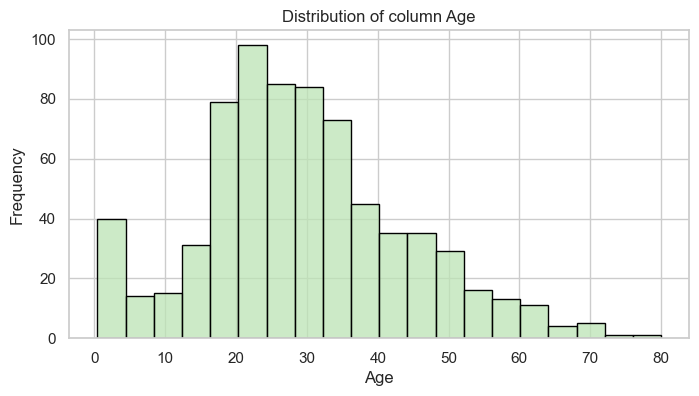

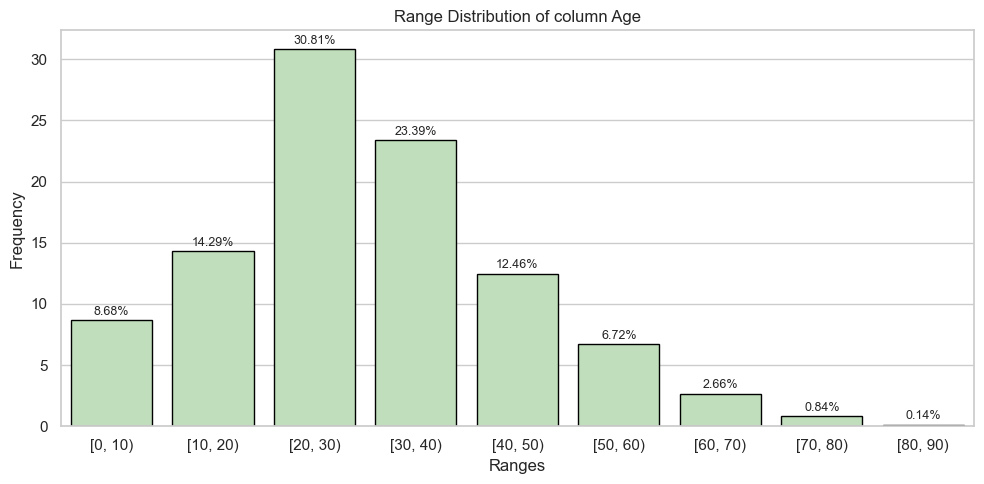

Bivariate Analysis


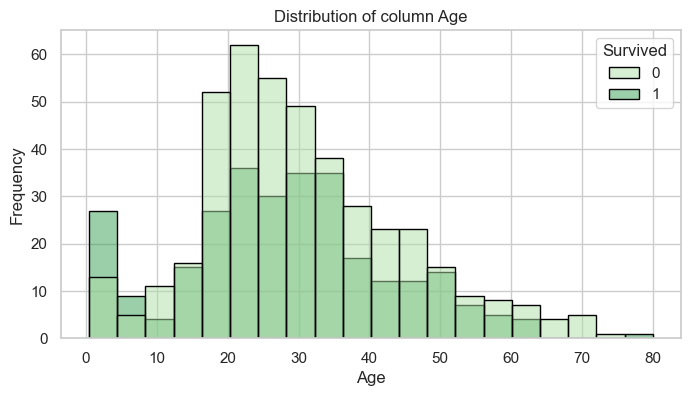

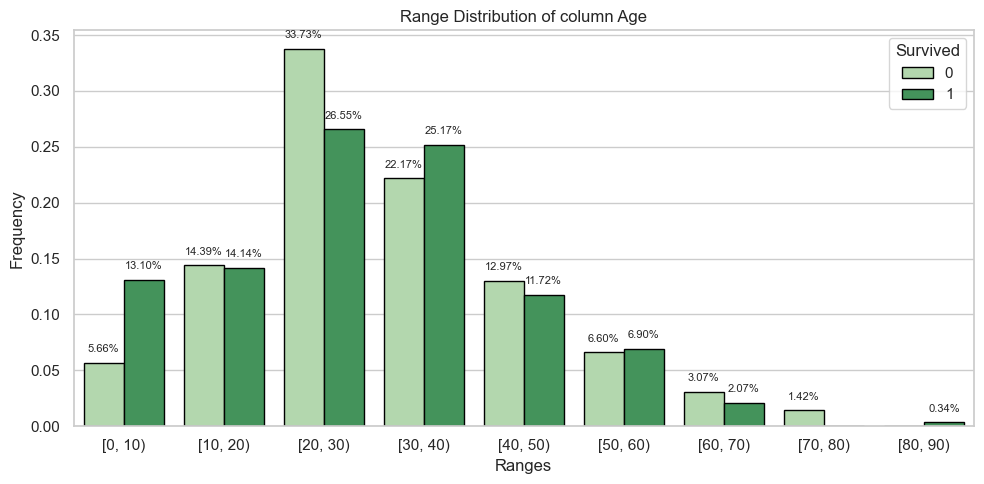

Tables


GT(_tbl_data=   AgeRange  Count_0  Count_1  Percentage_0  Percentage_1
0   [0, 10)   24.000   38.000         0.057         0.131
1  [10, 20)   61.000   41.000         0.144         0.141
2  [20, 30)  143.000   77.000         0.337         0.266
3  [30, 40)   94.000   73.000         0.222         0.252
4  [40, 50)   55.000   34.000         0.130         0.117
5  [50, 60)   28.000   20.000         0.066         0.069
6  [60, 70)   13.000    6.000         0.031         0.021
7  [70, 80)    6.000    0.000         0.014         0.000
8  [80, 90)    0.000    1.000         0.000         0.003, _body=<great_tables._gt_data.Body object at 0x000001BAEC6B5B70>, _boxhead=Boxhead([ColInfo(var='AgeRange', type=<ColInfoTypeEnum.default: 1>, column_label='AgeRange', column_align='center', column_width=None), ColInfo(var='Count_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None), ColInfo(var='Count_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=3, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=4, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=5, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=6, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=7, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=8, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id='0', spanner_level=0, spanner_label='0', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0'], built=None), SpannerInfo(spanner_id='1', spanner_level=0, spanner_label='1', spanner_units=None, spanner_pattern=None, vars=['Count_1', 'Percentage_1'], built=None), SpannerInfo(spanner_id='Survived', spanner_level=1, spanner_label='Survived', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0', 'Count_1', 'Percentage_1'], built=None)]), _heading=Heading(title='Count and Percentage Table', subtitle='Age vs Survived', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BAECC6E230>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001BAECC6E1A0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='white'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Times New Roman']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value=

Column: Fare

Univariate Analysis


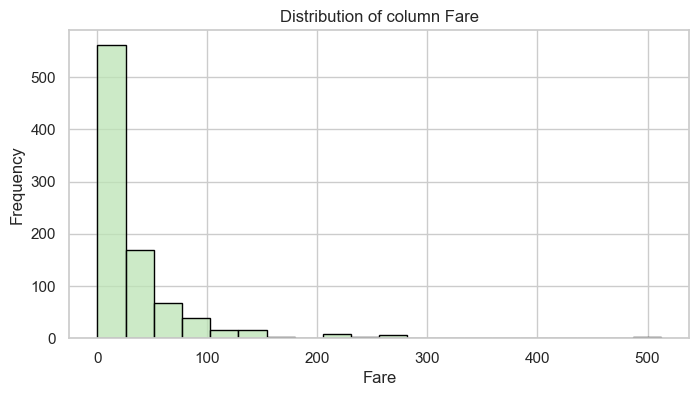

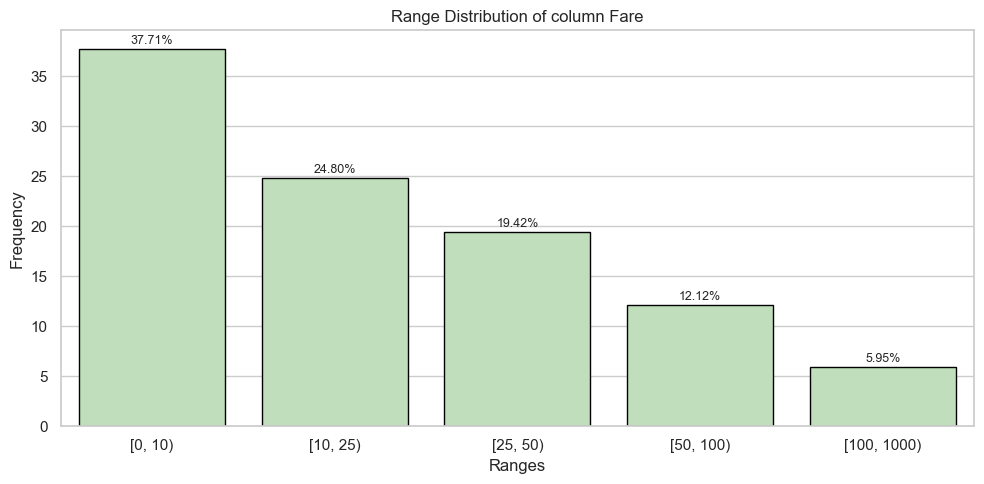

Bivariate Analysis


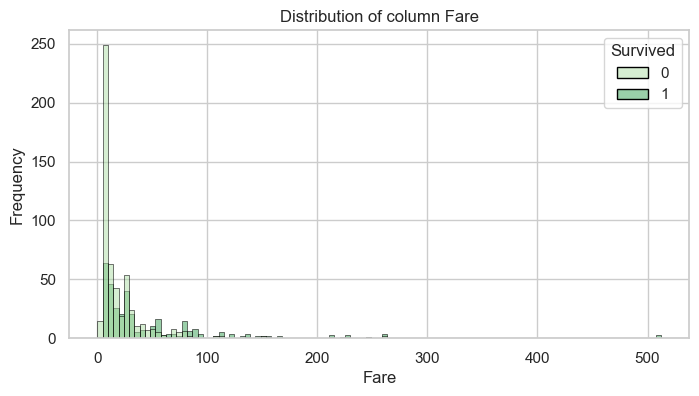

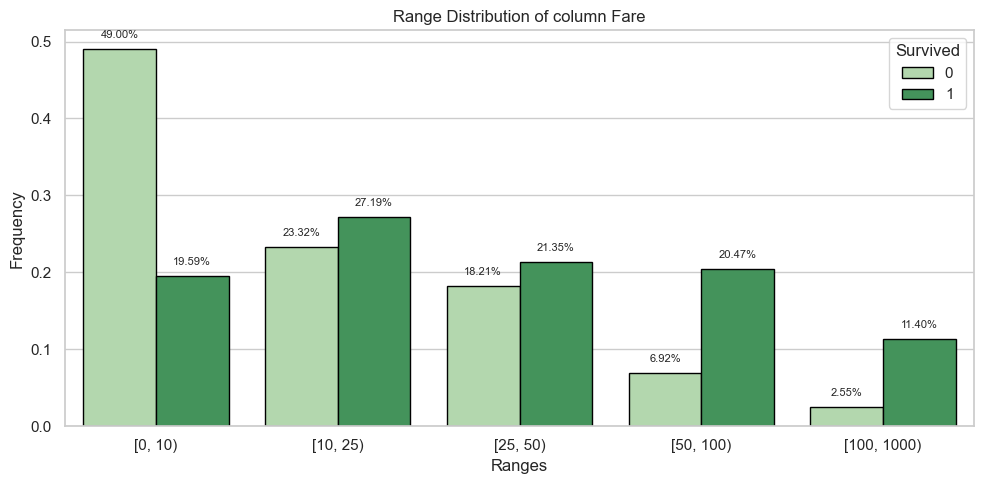

Tables


GT(_tbl_data=     FareRange  Count_0  Count_1  Percentage_0  Percentage_1
0      [0, 10)  269.000   67.000         0.490         0.196
1     [10, 25)  128.000   93.000         0.233         0.272
2     [25, 50)  100.000   73.000         0.182         0.213
3    [50, 100)   38.000   70.000         0.069         0.205
4  [100, 1000)   14.000   39.000         0.026         0.114, _body=<great_tables._gt_data.Body object at 0x000001BAECC4FE80>, _boxhead=Boxhead([ColInfo(var='FareRange', type=<ColInfoTypeEnum.default: 1>, column_label='FareRange', column_align='center', column_width=None), ColInfo(var='Count_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None), ColInfo(var='Count_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=3, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=4, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id='0', spanner_level=0, spanner_label='0', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0'], built=None), SpannerInfo(spanner_id='1', spanner_level=0, spanner_label='1', spanner_units=None, spanner_pattern=None, vars=['Count_1', 'Percentage_1'], built=None), SpannerInfo(spanner_id='Survived', spanner_level=1, spanner_label='Survived', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0', 'Count_1', 'Percentage_1'], built=None)]), _heading=Heading(title='Count and Percentage Table', subtitle='Fare vs Survived', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BAECC6F760>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001BAEC6B4F10>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='white'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Times New Roman']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='italic'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='tab

In [9]:
logger.info(f"floats: {float_columns}")

bins = {
    'Age': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    'Fare':  [0, 10, 25, 50, 100, 1000]
}

target = 'Survived'

for col in float_columns: 
    print(f"Column: {col}\n")
    print("Univariate Analysis")
    plot_histogram(train, col)
    plot_range_distribution(train, col, bins[col], figsize=(10, 5))
    print("Bivariate Analysis")
    plot_histogram_vo(train, col, target)
    plot_range_distribution_vo(train, col, bins[col], target, figsize=(10, 5))
    print("Tables")
    table = calculate_percentage_vo(train, col, bins[col], target)
    table = gt_tables(table,col,target)
    display(table)

To visually represent variables of type `int` or `object`, it is initially recommended to use the `value_counts` method from Pandas to count the unique values in that column. However, different considerations should be taken into account:

- When the number of unique values is small, it is appropriate to use `value_counts` directly for both `int` and `object` type variables.
- For `int` type variables with a large number of categories, it is useful to work with **value intervals** before creating graphical visualizations.
- For `object` type variables with multiple categories, it may be helpful to prioritize the most frequent ones and group the rest under a general label such as "others". However, if most values are unique, that variable may not provide relevant information for graphical representation (e.g., information such as addresses, phone numbers, emails, etc.).

2024-06-10 08:21:02.670 | INFO     | __main__:<module>:1 - Integers: ['PassengerId', 'Pclass', 'SibSp', 'Parch']
2024-06-10 08:21:02.671 | INFO     | __main__:<module>:2 - Objects: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Pclass
Univariate Analysis


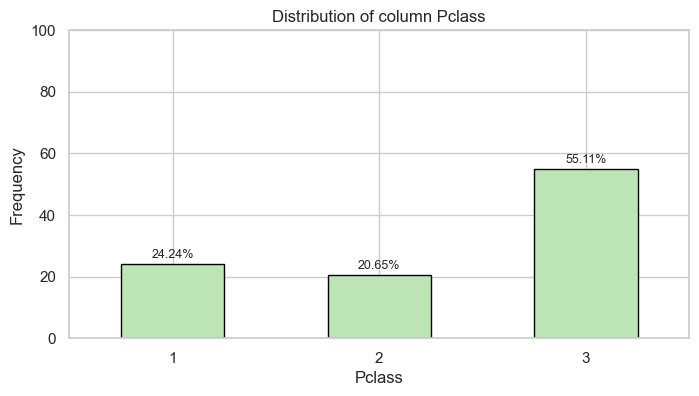

Bivariate Analysis


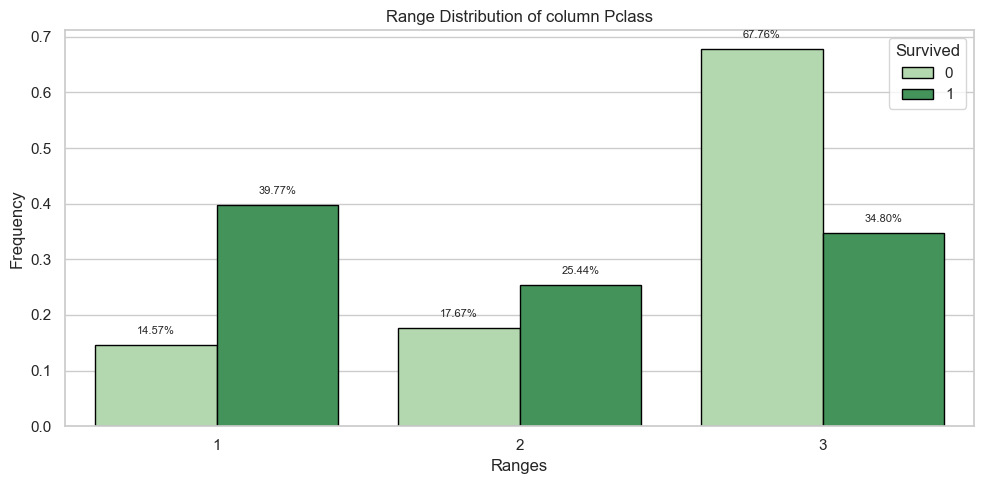

Tables


GT(_tbl_data=   Pclass  Count_0  Count_1  Percentage_0  Percentage_1
0       1   80.000  136.000         0.146         0.398
1       2   97.000   87.000         0.177         0.254
2       3  372.000  119.000         0.678         0.348, _body=<great_tables._gt_data.Body object at 0x000001BAECC6F760>, _boxhead=Boxhead([ColInfo(var='Pclass', type=<ColInfoTypeEnum.default: 1>, column_label='Pclass', column_align='right', column_width=None), ColInfo(var='Count_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None), ColInfo(var='Count_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id='0', spanner_level=0, spanner_label='0', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0'], built=None), SpannerInfo(spanner_id='1', spanner_level=0, spanner_label='1', spanner_units=None, spanner_pattern=None, vars=['Count_1', 'Percentage_1'], built=None), SpannerInfo(spanner_id='Survived', spanner_level=1, spanner_label='Survived', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0', 'Count_1', 'Percentage_1'], built=None)]), _heading=Heading(title='Count and Percentage Table', subtitle='Pclass vs Survived', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BAECC4FE80>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001BAEC6B6800>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='white'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Times New Roman']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='italic'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value=

SibSp
Univariate Analysis


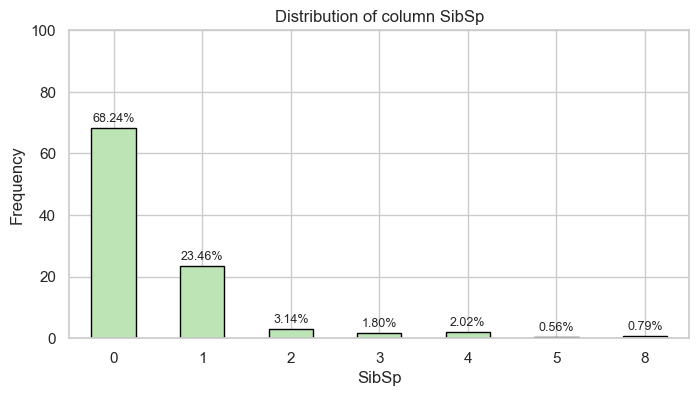

Bivariate Analysis


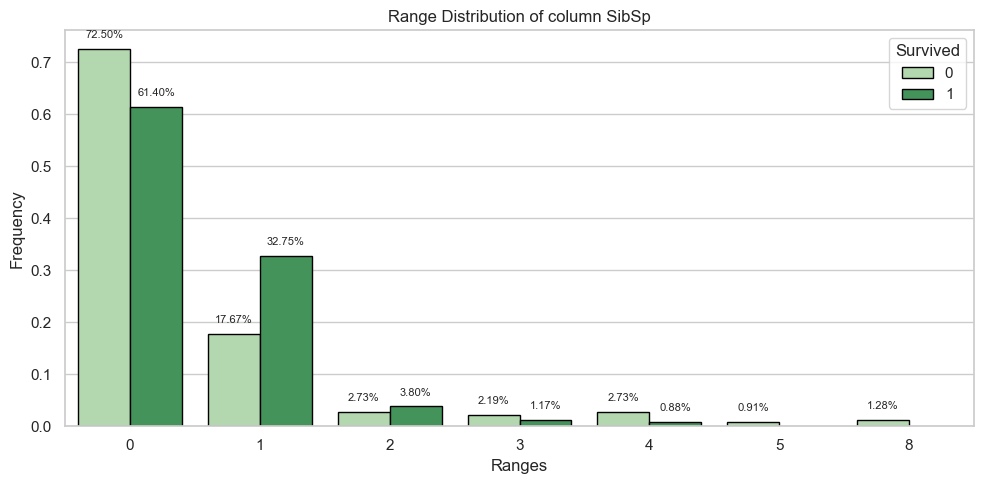

Tables


GT(_tbl_data=   SibSp  Count_0  Count_1  Percentage_0  Percentage_1
0      0  398.000  210.000         0.725         0.614
1      1   97.000  112.000         0.177         0.327
2      2   15.000   13.000         0.027         0.038
3      3   12.000    4.000         0.022         0.012
4      4   15.000    3.000         0.027         0.009
5      5    5.000    0.000         0.009         0.000
6      8    7.000    0.000         0.013         0.000, _body=<great_tables._gt_data.Body object at 0x000001BAEC63DE70>, _boxhead=Boxhead([ColInfo(var='SibSp', type=<ColInfoTypeEnum.default: 1>, column_label='SibSp', column_align='right', column_width=None), ColInfo(var='Count_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None), ColInfo(var='Count_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=3, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=4, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=5, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=6, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id='0', spanner_level=0, spanner_label='0', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0'], built=None), SpannerInfo(spanner_id='1', spanner_level=0, spanner_label='1', spanner_units=None, spanner_pattern=None, vars=['Count_1', 'Percentage_1'], built=None), SpannerInfo(spanner_id='Survived', spanner_level=1, spanner_label='Survived', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0', 'Count_1', 'Percentage_1'], built=None)]), _heading=Heading(title='Count and Percentage Table', subtitle='SibSp vs Survived', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BAECC6FA30>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001BAEC6B56F0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='white'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Times New Roman']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='italic'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_t

Parch
Univariate Analysis


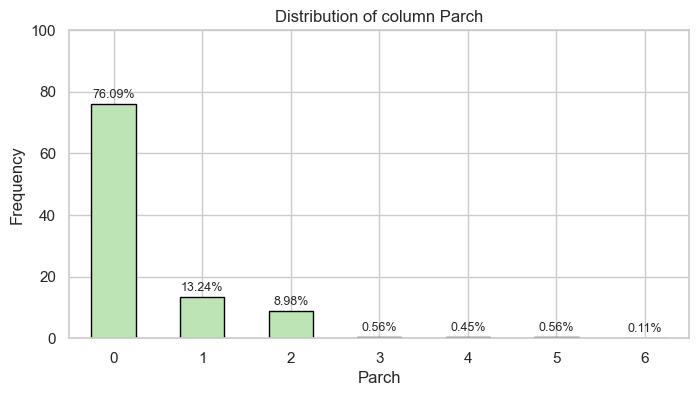

Bivariate Analysis


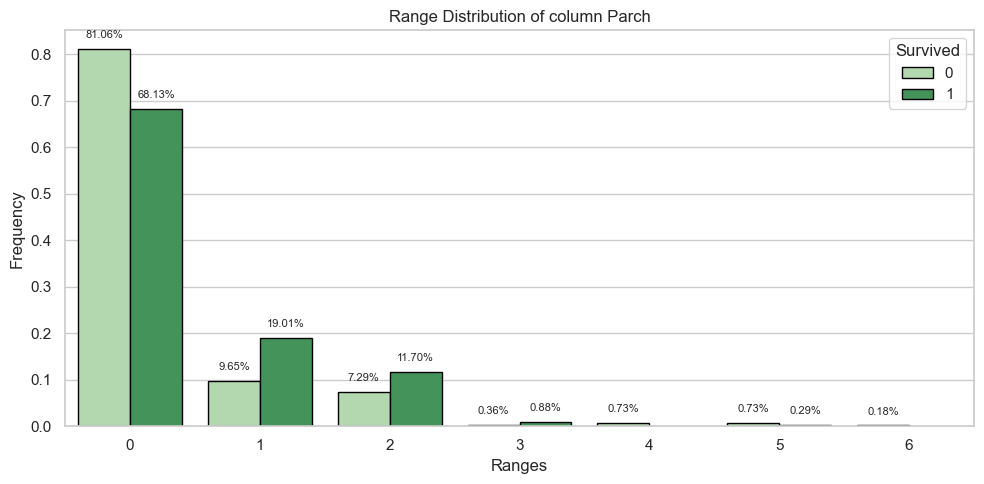

Tables


GT(_tbl_data=   Parch  Count_0  Count_1  Percentage_0  Percentage_1
0      0  445.000  233.000         0.811         0.681
1      1   53.000   65.000         0.097         0.190
2      2   40.000   40.000         0.073         0.117
3      3    2.000    3.000         0.004         0.009
4      4    4.000    0.000         0.007         0.000
5      5    4.000    1.000         0.007         0.003
6      6    1.000    0.000         0.002         0.000, _body=<great_tables._gt_data.Body object at 0x000001BAED24BC40>, _boxhead=Boxhead([ColInfo(var='Parch', type=<ColInfoTypeEnum.default: 1>, column_label='Parch', column_align='right', column_width=None), ColInfo(var='Count_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None), ColInfo(var='Count_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=3, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=4, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=5, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=6, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id='0', spanner_level=0, spanner_label='0', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0'], built=None), SpannerInfo(spanner_id='1', spanner_level=0, spanner_label='1', spanner_units=None, spanner_pattern=None, vars=['Count_1', 'Percentage_1'], built=None), SpannerInfo(spanner_id='Survived', spanner_level=1, spanner_label='Survived', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0', 'Count_1', 'Percentage_1'], built=None)]), _heading=Heading(title='Count and Percentage Table', subtitle='Parch vs Survived', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BAEC6B59C0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001BAECC6F760>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='white'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Times New Roman']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='italic'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_t

Sex
Univariate Analysis


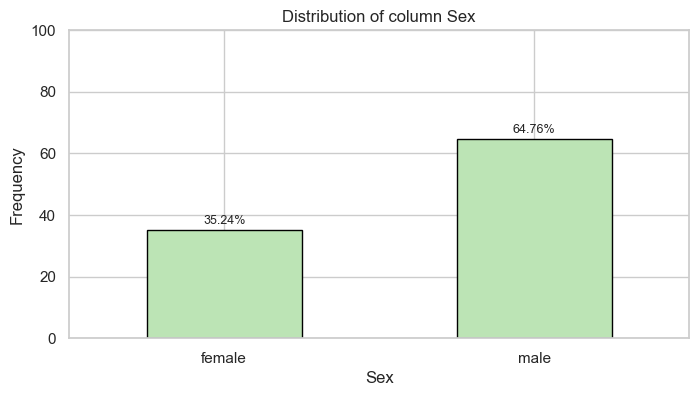

Bivariate Analysis


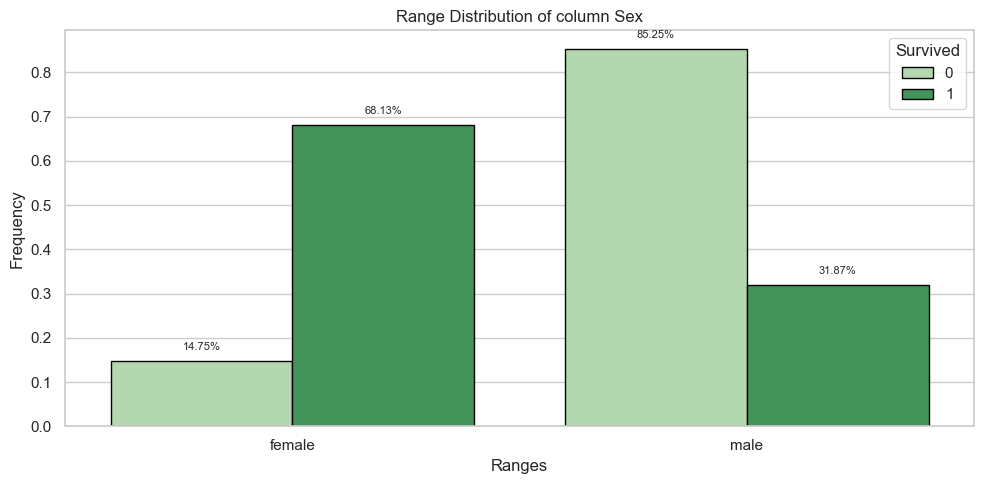

Tables


GT(_tbl_data=      Sex  Count_0  Count_1  Percentage_0  Percentage_1
0  female   81.000  233.000         0.148         0.681
1    male  468.000  109.000         0.852         0.319, _body=<great_tables._gt_data.Body object at 0x000001BAECC4F070>, _boxhead=Boxhead([ColInfo(var='Sex', type=<ColInfoTypeEnum.default: 1>, column_label='Sex', column_align='left', column_width=None), ColInfo(var='Count_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None), ColInfo(var='Count_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id='0', spanner_level=0, spanner_label='0', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0'], built=None), SpannerInfo(spanner_id='1', spanner_level=0, spanner_label='1', spanner_units=None, spanner_pattern=None, vars=['Count_1', 'Percentage_1'], built=None), SpannerInfo(spanner_id='Survived', spanner_level=1, spanner_label='Survived', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0', 'Count_1', 'Percentage_1'], built=None)]), _heading=Heading(title='Count and Percentage Table', subtitle='Sex vs Survived', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BAECC6C970>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001BAEC6B51B0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='white'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Times New Roman']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='italic'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInf

Embarked
Univariate Analysis


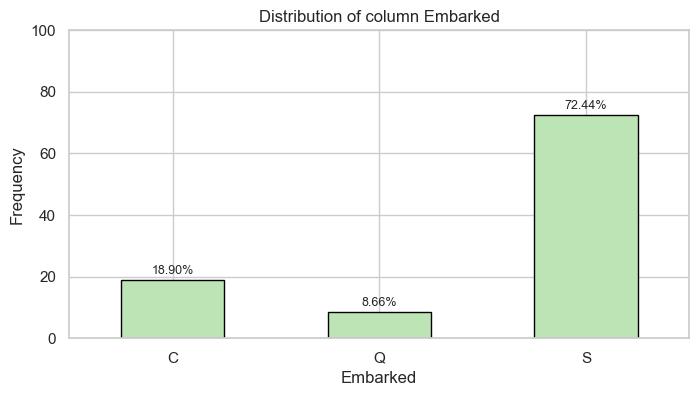

Bivariate Analysis


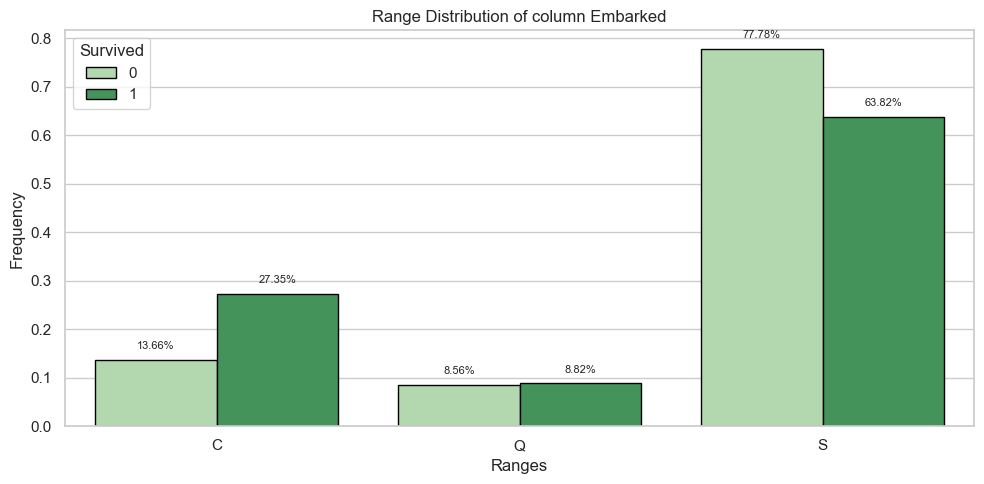

Tables


GT(_tbl_data=  Embarked  Count_0  Count_1  Percentage_0  Percentage_1
0        C   75.000   93.000         0.137         0.274
1        Q   47.000   30.000         0.086         0.088
2        S  427.000  217.000         0.778         0.638, _body=<great_tables._gt_data.Body object at 0x000001BAEDC23A90>, _boxhead=Boxhead([ColInfo(var='Embarked', type=<ColInfoTypeEnum.default: 1>, column_label='Embarked', column_align='left', column_width=None), ColInfo(var='Count_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_0', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None), ColInfo(var='Count_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Count', type='html'), column_align='right', column_width=None), ColInfo(var='Percentage_1', type=<ColInfoTypeEnum.default: 1>, column_label=Text(text='Percentage', type='html'), column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id='0', spanner_level=0, spanner_label='0', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0'], built=None), SpannerInfo(spanner_id='1', spanner_level=0, spanner_label='1', spanner_units=None, spanner_pattern=None, vars=['Count_1', 'Percentage_1'], built=None), SpannerInfo(spanner_id='Survived', spanner_level=1, spanner_label='Survived', spanner_units=None, spanner_pattern=None, vars=['Count_0', 'Percentage_0', 'Count_1', 'Percentage_1'], built=None)]), _heading=Heading(title='Count and Percentage Table', subtitle='Embarked vs Survived', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BAEC6B6980>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000001BAEC6B4A60>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='white'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Times New Roman']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='italic'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value

In [10]:
logger.info(f"Integers: {integer_columns}")
logger.info(f"Objects: {object_columns}")

for col in ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']:
    print(col)
    print("Univariate Analysis")
    plot_barplot(train, col)
    print("Bivariate Analysis")
    plot_barplot_vo(train, col, target, figsize=(10, 5))
    print("Tables")
    table = calculate_percentage_vo_int(train, col, target).fillna(0)
    table = gt_tables(table,col,target)
    display(table)

To perform exploratory analysis on the 'Cabin', 'Name', and 'Ticket' columns in the Titanic dataset, you can follow various approaches depending on the information they contain and the specific objectives of your analysis.


## Conclusion

In conclusion, we conducted an Exploratory Data Analysis (EDA) on the Titanic dataset, focusing on understanding the characteristics and distribution of various columns. We identified the data types and non-null values, checked for duplicates, and performed univariate and bivariate analyses on numerical and categorical variables. Through graphical representations and interval-based transformations, we gained insights into the data's structure and key factors influencing survival rates. This comprehensive EDA serves as a foundation for further in-depth analysis and modeling.
